### General Imports

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

### Collecting interpolated and averaged files

In [16]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv', './interpolatedData\\S-BU2.csv']


In [17]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR16 Blocked 1.csv', './stretchedAvgData\\OR16 Blocked 2.csv', './stretchedAvgData\\OR16 Unblocked.csv', './stretchedAvgData\\OR7 Blocked.csv', './stretchedAvgData\\OR7 Unblocked.csv']


### A little bit more data cleaning

In [18]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [19]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [20]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x,parse_dates=[0])

In [21]:
mergedData

,Date_Time,S-01,S-03,S-04,S-05,S-06,S-07,S-08,S-09,S-11,S-12,S-13,S-14,S-15,S-BU1,S-BU2,Average,Variance
0,2020-12-22 12:59:00,9,0,9,27,0,9,0,0,0,21,9,0,9,0,0,6.200000,62.400000
1,2020-12-22 12:59:10,4,0,0,27,4,9,0,9,0,9,9,0,0,0,3,4.933333,45.558333
2,2020-12-22 12:59:20,9,0,0,18,9,9,0,9,0,9,48,0,0,0,6,7.800000,134.775000
3,2020-12-22 12:59:30,9,18,9,9,0,9,0,0,0,21,27,0,0,0,9,7.400000,67.350000
4,2020-12-22 12:59:40,9,18,27,18,0,9,0,0,0,30,27,0,0,4,6,9.866667,109.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2020-12-22 16:08:00,0,0,0,0,9,0,0,9,0,0,1023,0,0,4,177,81.466667,61155.233333
1135,2020-12-22 16:08:10,0,0,0,18,0,0,0,21,0,0,1319,9,0,0,192,103.933333,100964.933333
1136,2020-12-22 16:08:20,4,0,0,18,0,9,0,0,0,33,1615,0,9,0,187,125.000000,150650.625000
1137,2020-12-22 16:08:30,30,0,0,0,0,9,0,0,0,33,1911,0,9,0,182,144.933333,210756.933333


### Plotting average and variance

Text(0.5, 1.0, 'Variance in Particles')

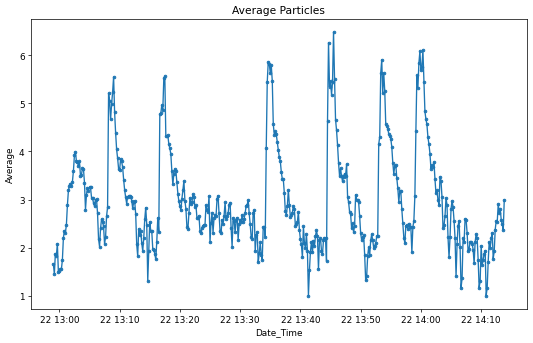

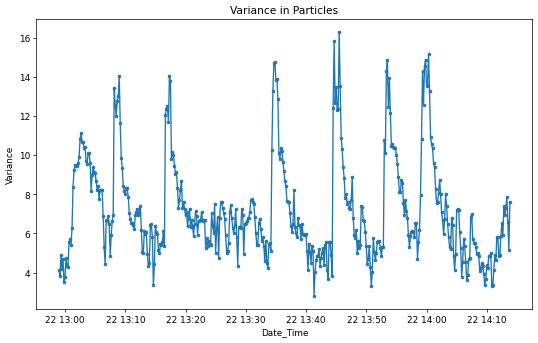

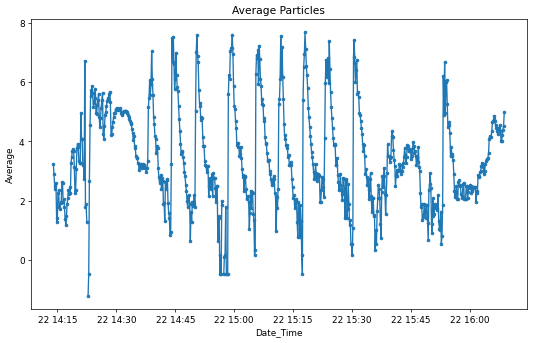

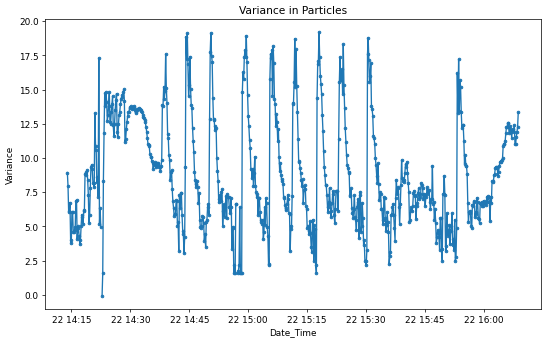

In [22]:
split = 450

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(4, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

Color Definitions

In [59]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

### Looking at each expirements data

In [23]:
indexList = {}
thresh = 4
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    print(indexList[x],'seconds',x)

112 seconds OR16 Blocked 1
101 seconds OR16 Blocked 2
88 seconds OR16 Unblocked
112 seconds OR7 Blocked
84 seconds OR7 Unblocked


Text(0.5, 1.0, 'Average Particles vs. Time')

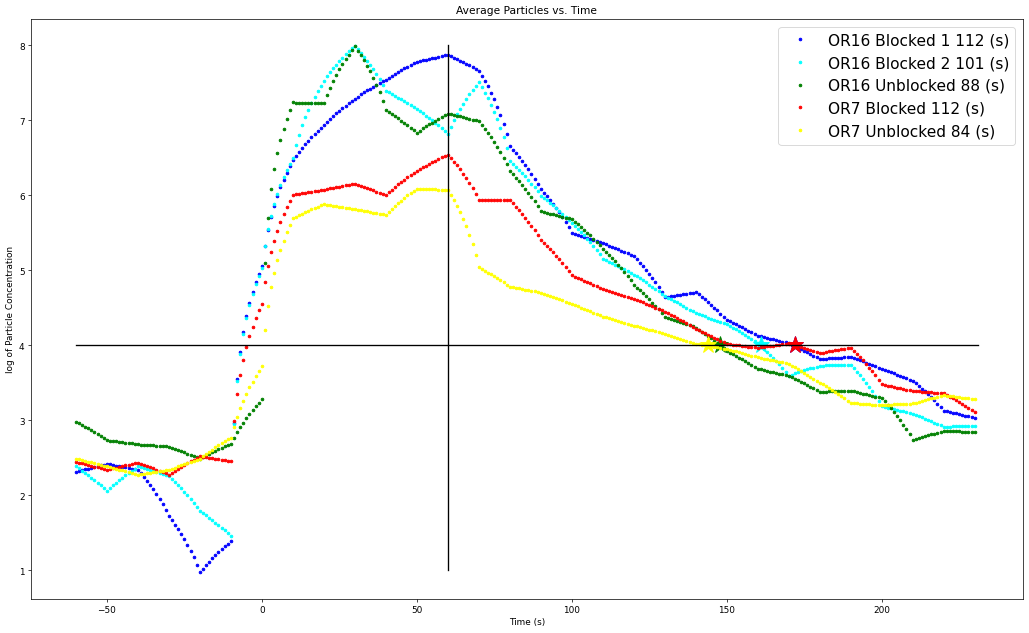

In [41]:
color = ['blue','cyan','green','red','yellow']
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData),'.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')
    ax.plot([xData+60],[thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')


ax.plot([-60,len(stAvgDf[x])-60],[thresh]*2,color = 'black')
ax.plot([60,60],[8,1],color = 'black')


ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')

# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

Text(0.5, 1.0, 'Outdoor Sensor Readings vs. Time')

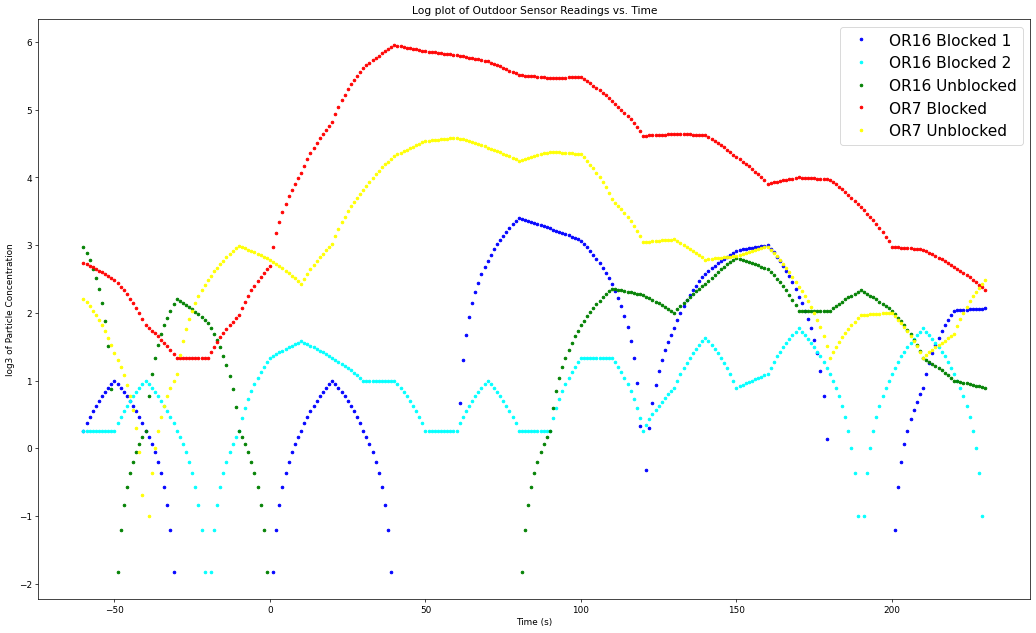

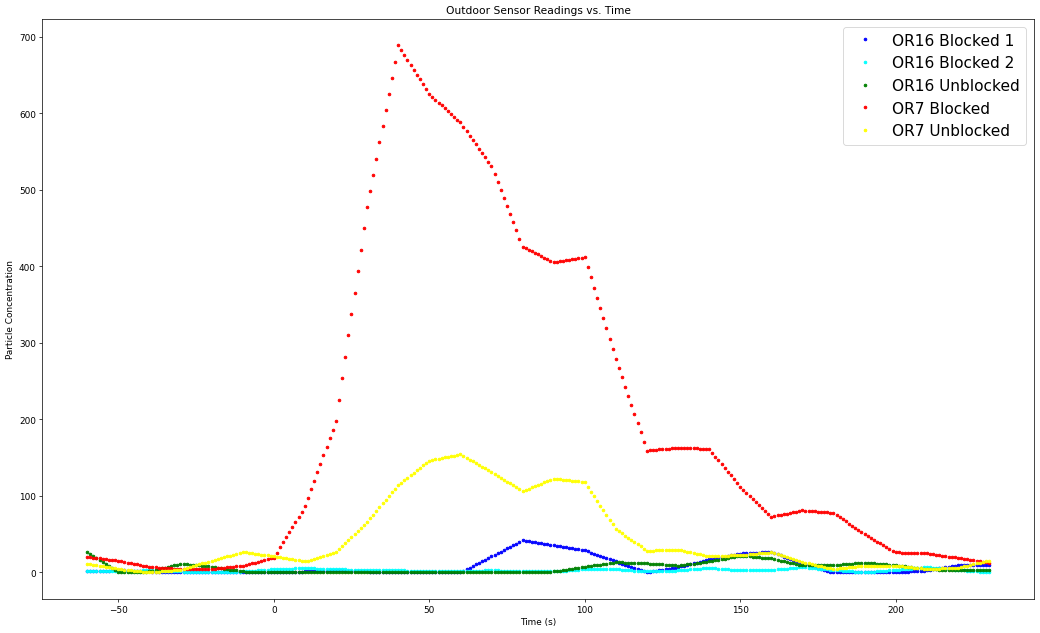

In [25]:
color = ['blue','cyan','green','red','yellow']
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    plt.title('Log plot of Outdoor Sensor Readings vs. Time')
    fig2 = plt.figure(1, figsize=(20,12), dpi=64)
    ax = fig.gca()
    ax2 = fig2.gca()
    yData = stAvgDf[x]['S-BU1']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)/np.log(3),'.',color = color[idx],label = x)

    ax2.plot([i for i in range(-60,len(yData)-60)],yData,'.',color = color[idx],label = x)


ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log3 of Particle Concentration')
ax2.legend(fontsize = 'xx-large')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Particle Concentration')
plt.title('Outdoor Sensor Readings vs. Time')

### Linear Regression

In [85]:
yData.values[-1]

20.822222222222226

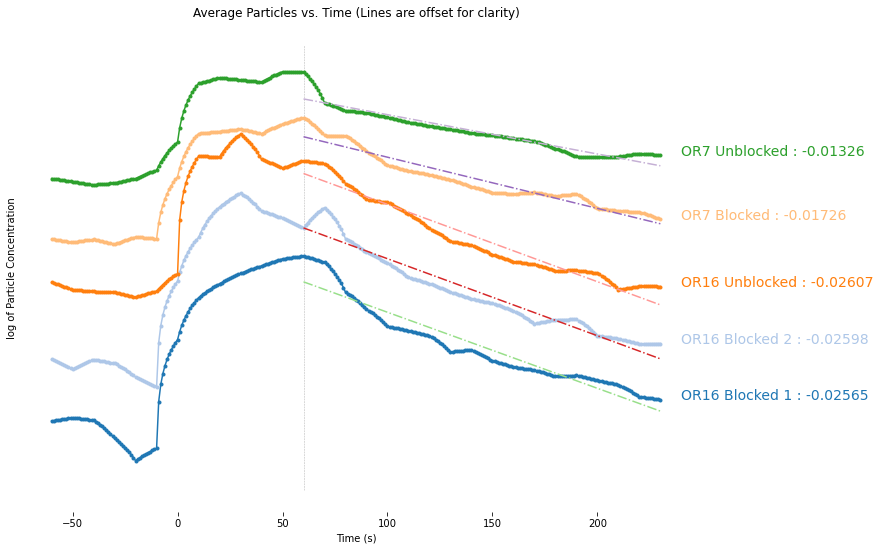

In [118]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(y))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*2,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*2,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*2
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


In [154]:
tmp = {}
for idx,x in enumerate(stAvgDf):
    print(x)
    columns = []
    tmp[x] = []
    for label in stAvgDf[x]:
        if (label == 'Average') or (label == 'Variance'):
            continue
        columns.append(label)
        yPoints = np.log(np.array(stAvgDf[x][label][120:],dtype=float))
        xPoints = np.array([i+60 for i in range(len(yPoints))])
        m,b = np.polyfit(xPoints,yPoints,1)
        tmp[x].append(round(m,3))
        print(label,round(m,3))
    
    

OR16 Blocked 1
S-01 nan
S-03 nan
S-04 0.011
S-05 -0.021
S-06 -0.005
S-07 -0.016
S-08 nan
S-09 -0.013
S-11 -0.024
S-12 -0.027
S-13 -0.029
S-14 -0.031
S-15 nan
S-BU1 nan
S-BU2 nan
OR16 Blocked 2
S-01 -0.001
S-03 nan
S-04 nan
S-05 -0.021
S-06 nan
S-07 nan
S-08 nan
S-09 -0.012
S-11 -0.016
S-12 -0.033
S-13 -0.038
S-14 -0.025
S-15 0.006
S-BU1 nan
S-BU2 nan
OR16 Unblocked
S-01 -0.0
S-03 nan
S-04 nan
S-05 -0.012
S-06 -0.006
S-07 nan
S-08 nan
S-09 nan
S-11 -0.032
S-12 -0.025
S-13 -0.039
S-14 -0.028
S-15 nan
S-BU1 nan
S-BU2 nan
OR7 Blocked
S-01 0.007
S-03 -0.007
S-04 -0.006
S-05 -0.006
S-06 -0.008
S-07 -0.015
S-08 nan
S-09 -0.037
S-11 nan
S-12 -0.018
S-13 -0.017
S-14 -0.021
S-15 -0.012
S-BU1 -0.022
S-BU2 nan
OR7 Unblocked
S-01 0.003
S-03 nan
S-04 -0.007
S-05 -0.009
S-06 -0.009
S-07 -0.015
S-08 nan
S-09 -0.019
S-11 0.007
S-12 -0.019
S-13 -0.011
S-14 nan
S-15 -0.018
S-BU1 -0.022
S-BU2 nan


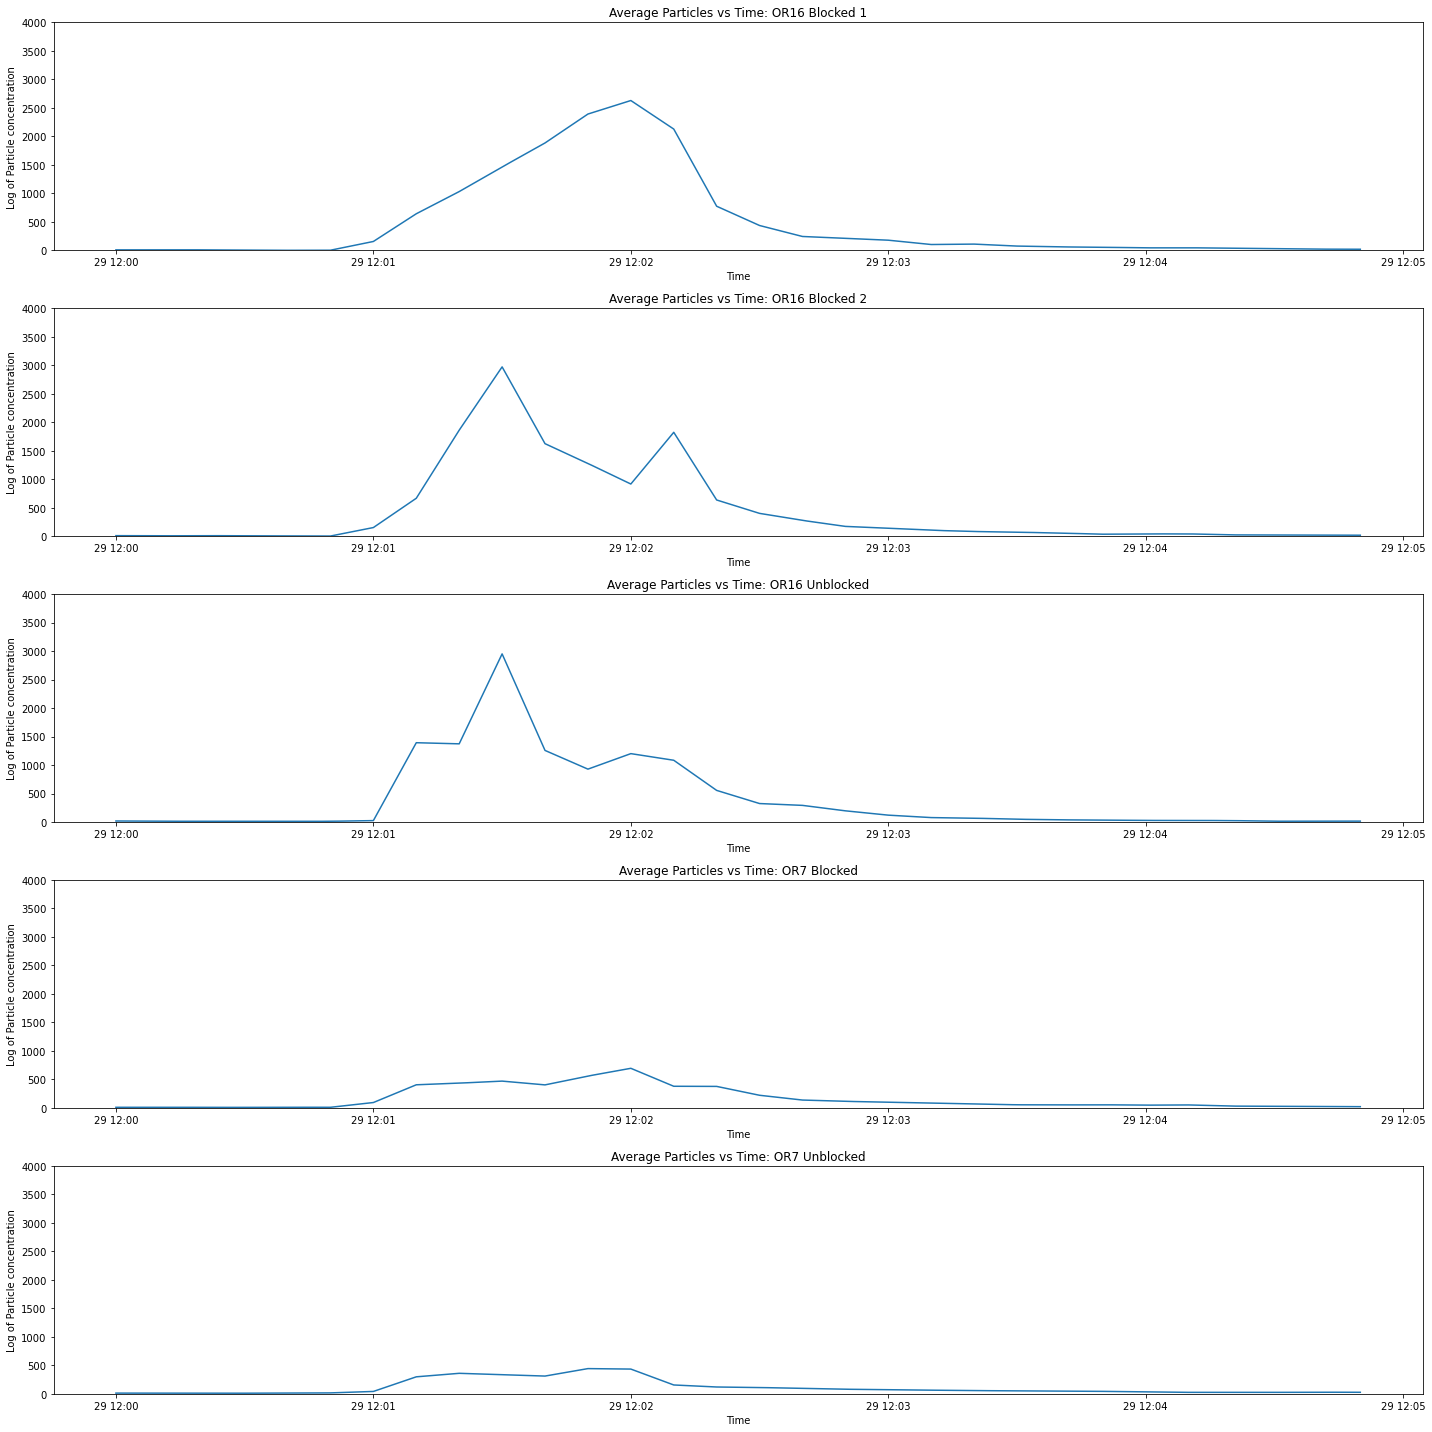

In [241]:
fig,stacked_graph=plt.subplots(len(stAvgDf),sharex=False,figsize=(20,20))
for idx,x in enumerate(stAvgDf):
    yData = stAvgDf[x]['Average']
    xData = pd.date_range(pd.Timestamp('12:00'),pd.Timestamp('12:05'),freq = 'S')[:291]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(y))])
    m,b = np.polyfit(xPoints,yPoints,1)

    stacked_graph[idx].plot(xData,(yData))
    stacked_graph[idx].set(title='Average Particles vs Time: ' + x,xlabel='Time',ylabel='Log of Particle concentration',autoscale_on=True,autoscaley_on=False,ylim=[0,4000])
    plt.tight_layout()




In [225]:
pd.date_range(pd.Timestamp('12:00'),pd.Timestamp('12:05'),freq = 'S').minutes()

AttributeError: 'DatetimeIndex' object has no attribute 'minutes'